['20230525aS10.txt', '20230525aS11.txt', '20230525aS7.txt', '20230525aS8.txt', '20230525aS9.txt']
 total SA with 0.8 ppm ozone 722733018098.3999


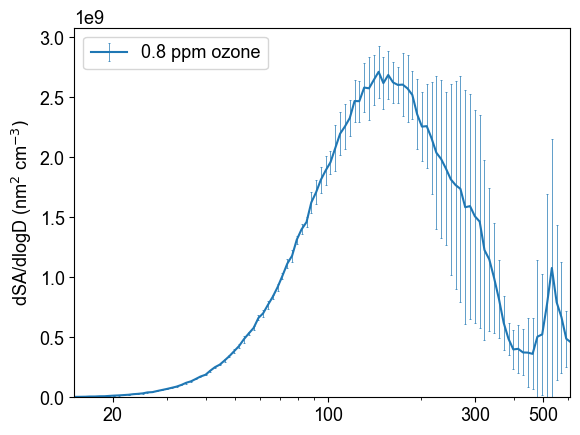

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

#Author: [Abigail McConnell]
#Date Created: 2023-11-01
#Last Modified: 2023-12-12
#Script Name: Aerosol_SA.py
#Description:
#    This script imports the SA file from the SMPS and plot the surface area size distribution on a log scale. plots
#    It also intgrated under the curve using the trapezium rule to calculate the total aerosol SA (nm2 cm-3)


# Specify the file path 
# Glob selects all folder that start with that name, so in this case will select the runs with the same prefix 

a_csv_files = glob.glob('20230525aS*.txt')

print(a_csv_files)

a_df_list = (pd.read_csv(file, sep="\t", header= None, skiprows = 21, skipfooter = 27, usecols = [1],  engine = 'python', encoding= 'unicode_escape') for file in a_csv_files)


a_df =pd.concat(a_df_list, axis=1, ignore_index=False)

# first work out the mean for all the runs 

a_df['mean'] = a_df.mean(axis=1)
a_df['std'] = a_df.std(axis=1)
a_df['diameter'] = pd.read_csv('20230525aS8.txt', sep="\t", header= None, skiprows = 21, skipfooter = 27, usecols = [0], engine = 'python', encoding= 'unicode_escape')


# from the mean run, then intergrate under the curve to work out the total aerosol surface area 

total_S_a = np.trapz( a_df['mean'], a_df['diameter'])

# print the total surface area for file a 

print(' total SA with 0.8 ppm ozone',total_S_a)




# ===== Plotting ========


# set font to Arial 
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['axes.titlesize'] = 13

# plot the data 

plt.errorbar(a_df['diameter'], a_df['mean'], yerr= a_df['std'], capsize=0.5, elinewidth=0.5, markeredgewidth=0.5, label = '0.8 ppm ozone')


plt.ylabel('dSA/dlogD (nm${^2}$ cm$^{-3})$')

# plot x scale on a log scale 

plt.xscale('log')

x_ticks = [20, 100, 300, 500]
x_labels =['20', '100', '300', '500']
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlim(15, 612)
plt.ylim(0,)
plt.legend()



